1. library import

In [2]:
import numpy as np
import pandas as pd

2. 드라이브 마운트 및 csv파일 업로드

In [3]:
from google.colab import drive
from google.colab import files

drive.mount('gdirve')


Mounted at gdirve



3. 데이터 로딩 (zip파일)

In [4]:
import matplotlib.pyplot as plt
import io
from zipfile import ZipFile
import gc



filepath = '/content/gdirve/MyDrive/lecture-2023-bigdata/인천광역시_운행속도_' #이거는 택시데이터 원본 csv파일을 사용하면 됨
csvlist = [filepath + '202001.zip']
chunksize = 10 ** 5 # 한번에 읽을 데이터 크기
data_filename = []
usecols = ['시간', '위도', '경도', '운행속도']
dfs=[] 

for csvfile in csvlist:
  with ZipFile(csvfile, 'r') as zipObj:
      listOfFileNames = zipObj.namelist()
      for fileName in listOfFileNames:
          if fileName.endswith('csv'): 
              print(fileName)
              with zipObj.open(fileName) as f:
                for chunk in pd.read_csv(f, chunksize=chunksize, usecols=usecols, encoding='cp949'):
                    chunk['위도'] = chunk['위도'].astype('float').round(5)
                    chunk['경도'] = chunk['경도'].astype('float').round(5)
                    chunk['운행속도'] = chunk['운행속도'].astype('uint8')
                    dfs.append(chunk)
                    del chunk
                    gc.collect()
                f.close()
      zipObj.close()





인천광역시_운행속도_202001.csv


4. 시간컬럼 -> 시간대별, 요일별로 나눔

In [5]:
date_format = '%Y-%m-%d %H:%M:%S' # CSV 파일에서 시간 데이터의 형식
for df in dfs:
    df['시간대별'] = pd.to_datetime(df['시간'], format=date_format).dt.hour
    df['요일별'] = pd.to_datetime(df['시간'], format=date_format).dt.dayofweek
    df.drop('시간', axis=1, inplace=True)

5. 쪼개서 불러왔던 데이터프레임 병합

In [6]:
result = pd.concat(dfs)
result = result[result['운행속도'] != 0]
del dfs
gc.collect()


0

6. 요일, 시간대, 위도, 경도, 운행속도로 총 집계 그루핑

In [7]:
#그루핑
max_speed = result['운행속도'].max() # 데이터의 최대 운행속도를 구함
result = result.groupby(['운행속도'], dropna=True).size().reset_index(name='개수')



In [8]:
print(result)

     운행속도       개수
0       1  2104850
1       2   898930
2       3   611182
3       4   523096
4       5   467827
..    ...      ...
157   158        2
158   160        1
159   162        3
160   163        2
161   164        4

[162 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

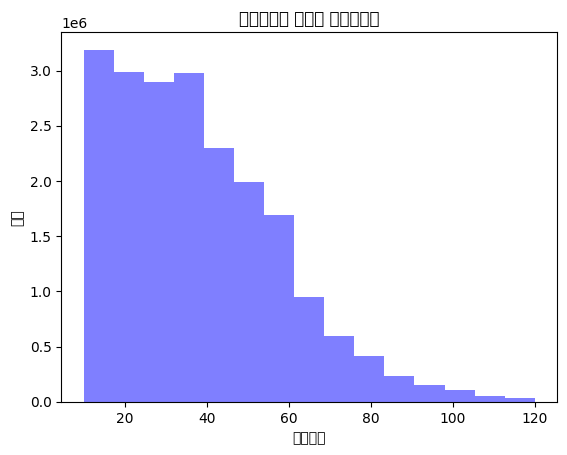

In [9]:
import matplotlib.pyplot as plt

result = result[(result['운행속도'] >= 10) & (result['운행속도'] <= 120)]
result['운행속도'] = result['운행속도']
x = result['운행속도']
y = result['개수']


plt.hist(x, bins=15, weights=y, color='blue', alpha=0.5)
plt.xlabel('운행속도')
plt.ylabel('개수')
plt.title('운행속도와 개수의 히스토그램')
plt.show()

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

result.dropna(subset=['운행속도', '개수'], inplace=True)



# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(result[['운행속도']], result['개수'])


# 예측 결과 얻기
predicted_y = model.predict(result[['운행속도']])


In [11]:
# 학습된 모델의 계수와 절편 확인
coefficients = model.coef_
intercept = model.intercept_

# 모델의 식 출력
print("모델의 식: y = {}x + {}".format(coefficients[0], intercept))

모델의 식: y = -4898.072253422254x + 503661.5253012753


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

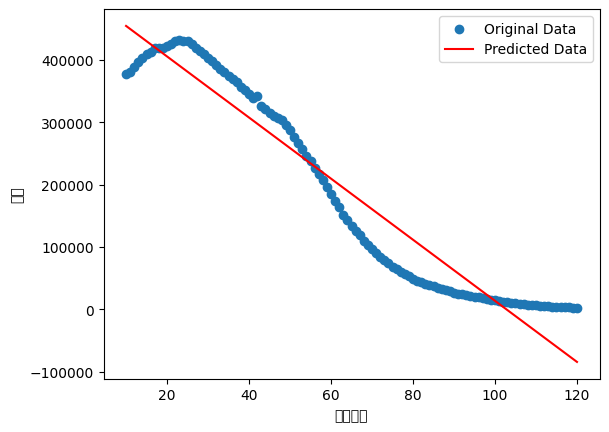

In [12]:
import matplotlib.pyplot as plt

# 원래 데이터와 모델 예측 결과 그래프로 표현
plt.scatter(result['운행속도'], result['개수'], label='Original Data')
plt.plot(result['운행속도'], predicted_y, color='red', label='Predicted Data')
plt.xlabel('운행속도')
plt.ylabel('개수')
plt.legend()
plt.show()

In [13]:
def calc(x):
  y = (-3706.7167 * x) + 442528.1834125318
  # -3706.7167430112577x + 442528.1834125318
  return y

In [14]:
for i in range(0, 120, 1):
  print(i, calc(i))

0 442528.1834125318
1 438821.4667125318
2 435114.7500125318
3 431408.03331253177
4 427701.3166125318
5 423994.5999125318
6 420287.8832125318
7 416581.1665125318
8 412874.4498125318
9 409167.73311253183
10 405461.0164125318
11 401754.2997125318
12 398047.5830125318
13 394340.8663125318
14 390634.1496125318
15 386927.4329125318
16 383220.7162125318
17 379513.9995125318
18 375807.2828125318
19 372100.5661125318
20 368393.8494125318
21 364687.13271253183
22 360980.4160125318
23 357273.6993125318
24 353566.9826125318
25 349860.2659125318
26 346153.54921253177
27 342446.8325125318
28 338740.1158125318
29 335033.3991125318
30 331326.6824125318
31 327619.9657125318
32 323913.2490125318
33 320206.5323125318
34 316499.8156125318
35 312793.0989125318
36 309086.3822125318
37 305379.66551253176
38 301672.9488125318
39 297966.2321125318
40 294259.5154125318
41 290552.7987125318
42 286846.0820125318
43 283139.3653125318
44 279432.64861253183
45 275725.93191253184
46 272019.2152125318
47 268312.498512

In [15]:
def find_x2(x1):
    target_y = calc(x1) / 2
    x2 = np.arange(0, 120.1, 0.1)  # x2 범위: 0부터 80까지 0.1 단위로 증가
    y2 = calc(x2)
    idx = np.abs(y2 - target_y).argmin()  # 타겟 y와의 차이가 가장 작은 인덱스 찾기
    return x2[idx]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120]
[ 59.7  60.2  60.7  61.2  61.7  62.2  62.7  63.2  63.7  64.2  64.7  65.2
  65.7  66.2  66.7  67.2  67.7  68.2  68.7  69.2  69.7  70.2  70.7  71.2
  71.7  72.2  72.7  73.2  73.7  74.2  74.7  75.2  75.7  76.2  76.7  77.2
  77.7  78.2  78.7  79.2  79.7  80.2  80.7  81.2  81.7  82.2  82.7  83.2
  83.7  84.2  84.7  85.2  85.7  86.2  86.7  87.2  87.7  88.2  88.7  89.2
  89.7  90.2  90.7  91.2  91.7  92.2  92.7  93.2  93.7  94.2  94.7  95.2
  95.7  96.2  96.7  97.2  97.7  98.2  98.7  99.2  99.7 100.2 100.7 101

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

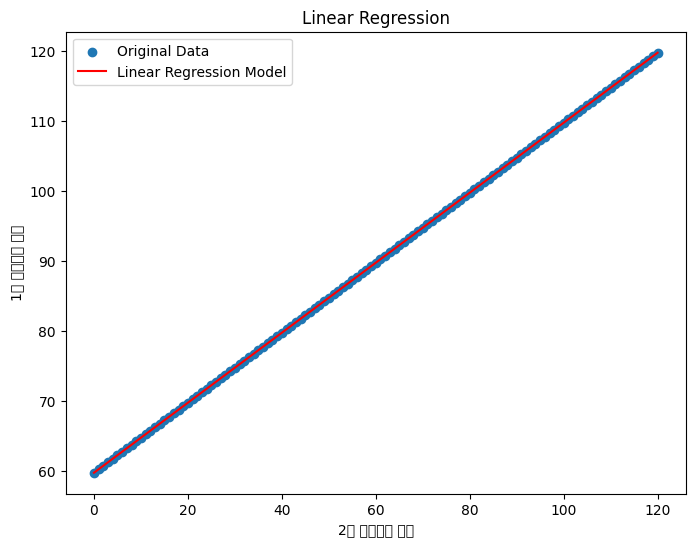

In [16]:
# 데이터 쌍 생성
# 원래 데이터
x_original = np.arange(0, 121)
y_original = np.array([find_x2(x) for x in x_original])

# 데이터 셋 분리
X = np.array(x_original).reshape(-1, 1)
y = np.array(y_original)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

print(x_original)
print(y_original)


# 학습된 모델의 기울기와 절편 출력
slope = model.coef_[0]
intercept = model.intercept_
print(f"선형 방정식: y = {slope:.2f} * x + {intercept:.2f}")



# 선형 회귀 모델의 예측 결과
x_pred = np.arange(0, 121)
y_pred = model.predict(x_pred.reshape(-1, 1))

# 그래프로 표현
plt.figure(figsize=(8, 6))
plt.scatter(x_original, y_original, label='Original Data')
plt.plot(x_pred, y_pred, color='red', label='Linear Regression Model')
plt.xlabel('2배 유동차량 속도')
plt.ylabel('1배 유동차량 속도')
plt.title('Linear Regression')
plt.legend()
plt.show()

# 최종 위험지수 도출 수행
- 변수는 운행속도(A)와, 위험도(B). 둘 다 최종 위험지수(Y)와는 양의 상관관계를 가짐
- 유동차량수는 ~A 라고 하겠음
- 운행속도와 위험도를 단순 곱할수는 없으므로 임의의 상관관계를 지정했음
- [사망사고 3건, 유동차량 100대] Region1과 [사망사고 4건, 유동차량 200대]의 Region2의 최종 위험지수는 같다고 가설을 세움
  * == "B가 3인 지역 Region1과", "B가 4이면서 ~A가 Region1의 2배인 Region2"의 Y은 같다고 가설을 세움
- 어떤 운행속도에 대해서 유동차량이 2배가 되는 운행속도를 구하는 식은 아래에 따름
  * 운행속도대비유동차량.ipynb에 의해 도출
  * A' = 0.50 * A + 59.70 
- 위의 식을 이용하여 현재 운행속도를 기반으로, 위의 가설을 사용할 보정계수를 도출할 수 있음

### 위험도 보정계수 : (((3 / 2) * df_taxi['운행속도']) + ((59.7) * 3)) / (4 * df_taxi['운행속도'])